<a href="https://colab.research.google.com/github/Aditya1BM22CS017/6A-ML-Lab-Batch2/blob/main/1BM22CS017_Lab_11_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

clf = LogisticRegression()
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy using PCA with 2 components:", accuracy)


Accuracy using PCA with 2 components: 0.5166666666666667


Original data shape: (100, 2)
Reduced data shape (with 1 component): (100, 1)

Explained variance ratio (1 component): [0.68856826]

Reduced data shape (with 2 components): (100, 2)
Explained variance ratio (2 components): [0.68856826 0.31143174]
Visualization is only supported for original data with 2 or 3 features. Original data has 2 features.


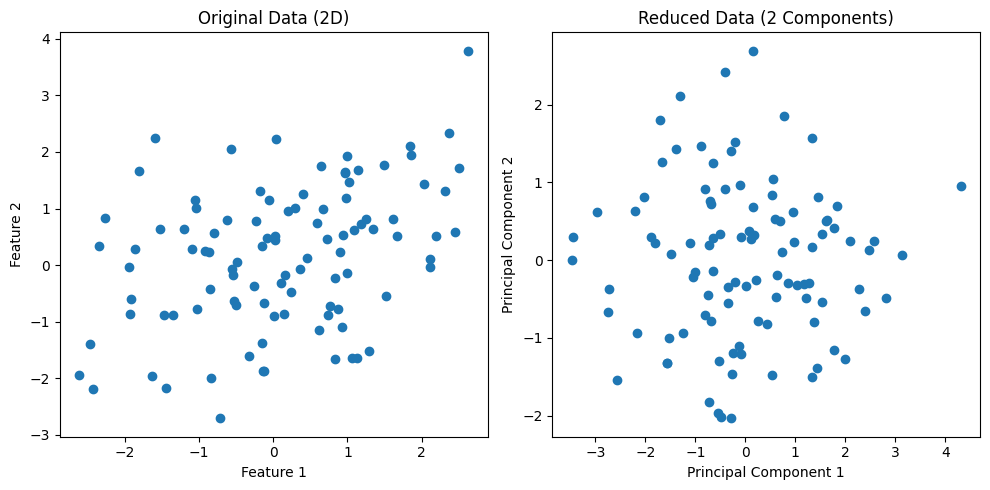


Original 3D data shape: (100, 3)
Reduced 3D data shape (to 2 components): (100, 2)
Explained variance ratio (2 components for 3D data): [0.46031414 0.36523668]


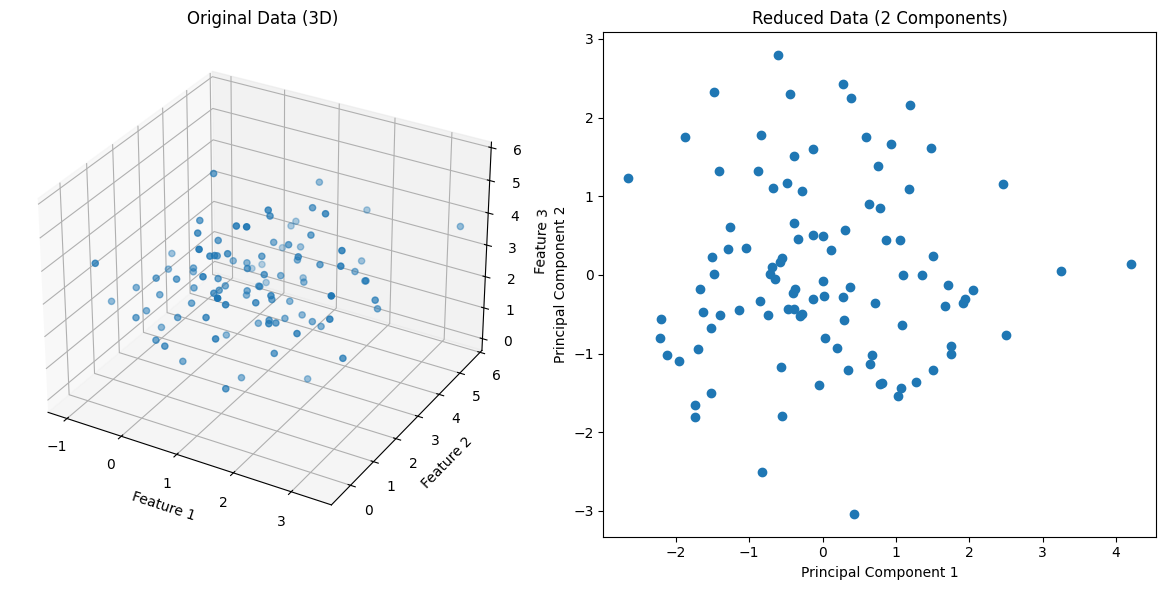


Reduced 3D data shape (to 3 components): (100, 3)
Explained variance ratio (3 components for 3D data): [0.46031414 0.36523668 0.17444918]


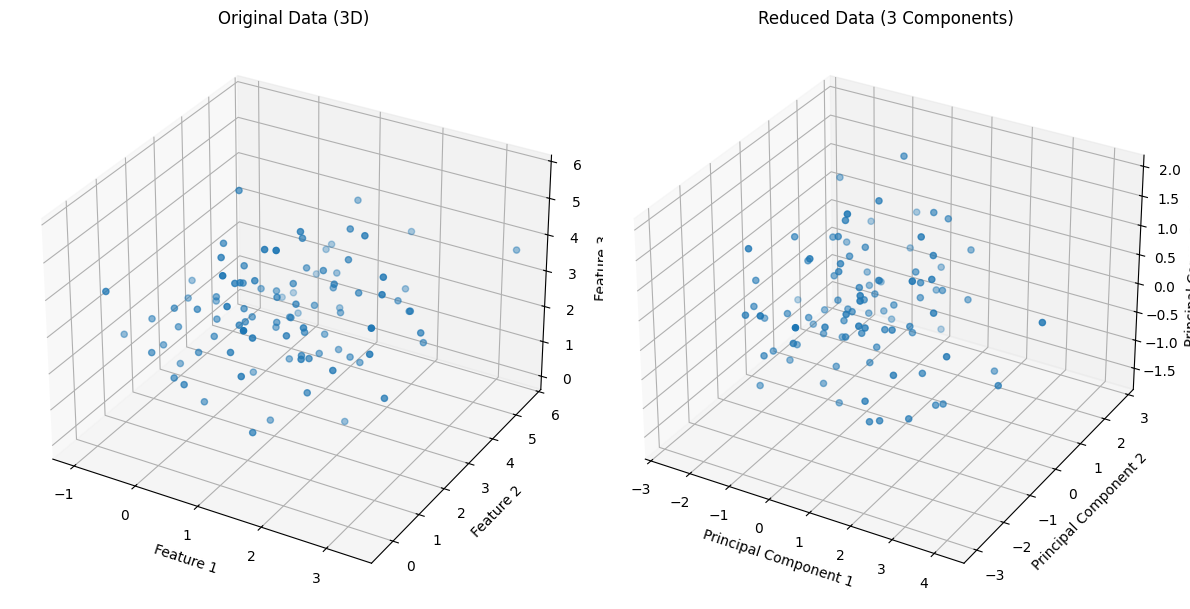

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def apply_pca(data, n_components=None):
    """
    Applies Principal Component Analysis (PCA) to the input data.

    Args:
        data (numpy.ndarray): The input data matrix (n_samples x n_features).
        n_components (int, optional): The number of principal components to keep.
                                       If None, all components are kept. Defaults to None.

    Returns:
        tuple: A tuple containing:
            - reduced_data (numpy.ndarray): The data projected onto the principal components.
            - pca (sklearn.decomposition.PCA): The fitted PCA object.
    """
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(data)
    return reduced_data, pca

def visualize_pca(original_data, reduced_data, n_components):
    """
    Visualizes the original and reduced data (only for 2D or 3D original data).

    Args:
        original_data (numpy.ndarray): The original data matrix.
        reduced_data (numpy.ndarray): The reduced data matrix (should have 2 or 3 components).
        n_components (int): The number of principal components used.
    """
    original_n_features = original_data.shape[1]
    reduced_n_features = reduced_data.shape[1]

    if original_n_features == 2 and reduced_n_features == 2:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(original_data[:, 0], original_data[:, 1])
        plt.title("Original Data (2D)")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")

        plt.subplot(1, 2, 2)
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
        plt.title(f"Reduced Data ({n_components} Components)")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.tight_layout()
        plt.show()
    elif original_n_features == 3 and reduced_n_features in [2, 3]:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(12, 6))

        ax1 = fig.add_subplot(121, projection='3d')
        ax1.scatter(original_data[:, 0], original_data[:, 1], original_data[:, 2])
        ax1.set_title("Original Data (3D)")
        ax1.set_xlabel("Feature 1")
        ax1.set_ylabel("Feature 2")
        ax1.set_zlabel("Feature 3")

        ax2 = fig.add_subplot(122, projection='3d' if reduced_n_features == 3 else None)
        if reduced_n_features == 3:
            ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2])
            ax2.set_zlabel("Principal Component 3")
        else:
            ax2.scatter(reduced_data[:, 0], reduced_data[:, 1])
        ax2.set_title(f"Reduced Data ({n_components} Components)")
        ax2.set_xlabel("Principal Component 1")
        ax2.set_ylabel("Principal Component 2")
        plt.tight_layout()
        plt.show()
    else:
        print(f"Visualization is only supported for original data with 2 or 3 features. Original data has {original_n_features} features.")

if __name__ == "__main__":
    # Generate some sample data
    np.random.seed(42)
    mean = [0, 0]
    cov = [[2, 1], [1, 2]]
    data = np.random.multivariate_normal(mean, cov, 100)

    # Apply PCA to reduce to 1 component
    n_components_to_keep = 1
    reduced_data_1, pca_1 = apply_pca(data, n_components=n_components_to_keep)
    print(f"Original data shape: {data.shape}")
    print(f"Reduced data shape (with {n_components_to_keep} component): {reduced_data_1.shape}")
    print("\nExplained variance ratio (1 component):", pca_1.explained_variance_ratio_)

    # Apply PCA to reduce to 2 components (which is the original dimension here)
    n_components_to_keep = 2
    reduced_data_2, pca_2 = apply_pca(data, n_components=n_components_to_keep)
    print(f"\nReduced data shape (with {n_components_to_keep} components): {reduced_data_2.shape}")
    print("Explained variance ratio (2 components):", pca_2.explained_variance_ratio_)

    # Visualize the results for 2D original data
    visualize_pca(data, reduced_data_1, n_components=1)  # Changed to 'n_components'
    visualize_pca(data, reduced_data_2, n_components=2)  # Changed to 'n_components'

    # Example with 3D data
    np.random.seed(123)
    mean_3d = [1, 2, 3]
    cov_3d = [[1, 0.5, 0.2], [0.5, 1.5, 0.1], [0.2, 0.1, 1]]
    data_3d = np.random.multivariate_normal(mean_3d, cov_3d, 100)

    reduced_data_3d_2, pca_3d_2 = apply_pca(data_3d, n_components=2)
    print(f"\nOriginal 3D data shape: {data_3d.shape}")
    print(f"Reduced 3D data shape (to 2 components): {reduced_data_3d_2.shape}")
    print("Explained variance ratio (2 components for 3D data):", pca_3d_2.explained_variance_ratio_)
    visualize_pca(data_3d, reduced_data_3d_2, n_components=2) # Changed to 'n_components'

    reduced_data_3d_3, pca_3d_3 = apply_pca(data_3d, n_components=3)
    print(f"\nReduced 3D data shape (to 3 components): {reduced_data_3d_3.shape}")
    print("Explained variance ratio (3 components for 3D data):", pca_3d_3.explained_variance_ratio_)
    visualize_pca(data_3d, reduced_data_3d_3, n_components=3)

In [2]:
import numpy as np
from sklearn.decomposition import PCA

def reduce_dimensions(data, n_components):
    """Applies PCA to reduce data dimensionality.

    Args:
        data (numpy.ndarray): Input data (n_samples x n_features).
        n_components (int): Number of principal components to keep.

    Returns:
        numpy.ndarray: Reduced data (n_samples x n_components).
    """
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(data)
    return reduced_data

if __name__ == "__main__":
    # Example usage
    np.random.seed(42)
    data = np.random.rand(100, 5)  # 100 samples, 5 features
    n_components_to_keep = 2
    reduced_data = reduce_dimensions(data, n_components_to_keep)
    print("Original data shape:", data.shape)
    print("Reduced data shape:", reduced_data.shape)

Original data shape: (100, 5)
Reduced data shape: (100, 2)


In [3]:

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Download Load_digits from sklearn dataset
digits = load_digits()
X = digits.data
y = digits.target

# 2. Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Perform scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Build a PCA model with no_of_components=2
n_components = 2
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 5. Predict score using logistic regression on PCA-transformed data
logistic_regression = LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr')
logistic_regression.fit(X_train_pca, y_train)
y_pred_pca = logistic_regression.predict(X_test_pca)

# 6. Predict accuracy score using PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy score with {n_components} principal components: {accuracy_pca:.4f}")

# Optional: Predict score using logistic regression on original scaled data for comparison
logistic_regression_original = LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr')
logistic_regression_original.fit(X_train_scaled, y_train)
y_pred_original = logistic_regression_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy score with original scaled data: {accuracy_original:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy score with 2 principal components: 0.5083
Accuracy score with original scaled data: 0.9667


In [4]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import kagglehub
import os

# --- Download dataset using kagglehub ---
try:
    path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction", path=".")
    print("Path to downloaded dataset files:", path)

    # Assuming the CSV file is directly in the downloaded folder or a subfolder
    # Let's try to find the 'heart.csv' file
    heart_csv_path = ""
    for root, _, files in os.walk(path):
        if 'heart.csv' in files:
            heart_csv_path = os.path.join(root, 'heart.csv')
            break

    if not heart_csv_path:
        raise FileNotFoundError("heart.csv not found in the downloaded dataset.")

    # Load the dataset
    df = pd.read_csv(heart_csv_path)

except ImportError:
    print("Error: kagglehub library not found. Please install it using: pip install kagglehub")
    exit()
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Please ensure you are authenticated with Kaggle and the dataset exists.")
    exit()
except Exception as e:
    print(f"An error occurred during download: {e}")
    exit()

# Display initial info
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nDataset information:")
df.info()

# --- 2. Remove Outliers using Z-score ---
numerical_cols = df.select_dtypes(include=np.number).columns
z_scores = df[numerical_cols].apply(zscore)
df_filtered = df[(z_scores > -3).all(axis=1) & (z_scores < 3).all(axis=1)]
print(f"\nOriginal DataFrame shape: {df.shape}")
print(f"DataFrame shape after outlier removal: {df_filtered.shape}")

# --- 3. Convert Text Columns to Numbers ---
categorical_cols = df_filtered.select_dtypes(include='object').columns
binary_cols = []
multi_category_cols = []
for col in categorical_cols:
    if df_filtered[col].nunique() == 2:
        binary_cols.append(col)
    else:
        multi_category_cols.append(col)

label_encoders = {}
for col in binary_cols:
    label_encoders[col] = LabelEncoder()
    df_filtered[col] = label_encoders[col].fit_transform(df_filtered[col])

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cols = one_hot_encoder.fit_transform(df_filtered[multi_category_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=one_hot_encoder.get_feature_names_out(multi_category_cols))

df_filtered = df_filtered.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
df_processed = pd.concat([df_filtered.drop(multi_category_cols, axis=1), encoded_df], axis=1)

print("\nDataFrame after encoding categorical features:")
print(df_processed.head())

# --- 4. Apply Scaling ---
numerical_cols_scaled = df_processed.select_dtypes(include=np.number).drop('HeartDisease', axis=1).columns
scaler = StandardScaler()
df_processed[numerical_cols_scaled] = scaler.fit_transform(df_processed[numerical_cols_scaled])

print("\nDataFrame after scaling numerical features:")
print(df_processed.head())

# --- 5. Build and Evaluate Classification Models (Without PCA) ---
X = df_processed.drop('HeartDisease', axis=1)
y = df_processed['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_model = SVC(random_state=42)
logistic_model = LogisticRegression(random_state=42, solver='liblinear')
rf_model = RandomForestClassifier(random_state=42)

models = {'SVM': svm_model, 'Logistic Regression': logistic_model, 'Random Forest': rf_model}
baseline_accuracies = {}

print("\n--- Model Performance without PCA ---")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    baseline_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# --- 6. Now use PCA to reduce dimensions, retrain your model and see what impact it has ---
pca = PCA(n_components=0.95) # Keep components that explain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"\nNumber of components before PCA: {X_train.shape[1]}")
print(f"Number of components after PCA: {X_train_pca.shape[1]}")

pca_accuracies = {}

print("\n--- Model Performance with PCA ---")
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred_pca = model.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    pca_accuracies[name] = accuracy_pca
    print(f"{name} Accuracy (with PCA): {accuracy_pca:.4f}")

# --- Comparison of Results ---
print("\n--- Comparison of Accuracies ---")
for name in models.keys():
    print(f"{name}:")
    print(f"  Without PCA: {baseline_accuracies[name]:.4f}")
    print(f"  With PCA:    {pca_accuracies[name]:.4f}")

Path to downloaded dataset files: /kaggle/input/heart-failure-prediction/.

First few rows of the dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data c

<ipython-input-4-f61dc74e9acf>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = label_encoders[col].fit_transform(df_filtered[col])
<ipython-input-4-f61dc74e9acf>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = label_encoders[col].fit_transform(df_filtered[col])


        Age       Sex  RestingBP  Cholesterol  FastingBS     MaxHR  \
0 -1.428154  0.515943   0.465900     0.849636  -0.550362  1.384320   
1 -0.475855 -1.938199   1.634714    -0.168122  -0.550362  0.752973   
2 -1.745588  0.515943  -0.118507     0.793612  -0.550362 -1.535661   
3 -0.581666 -1.938199   0.349019     0.149344  -0.550362 -1.141069   
4  0.053200  0.515943   1.050307    -0.028064  -0.550362 -0.588640   

   ExerciseAngina   Oldpeak  HeartDisease  ChestPainType_ASY  \
0       -0.822945 -0.855469             0          -1.077524   
1       -0.822945  0.137516             1          -1.077524   
2       -0.822945 -0.855469             0          -1.077524   
3        1.215148  0.634008             1           0.928054   
4       -0.822945 -0.855469             0          -1.077524   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  \
0           2.063325          -0.534905          -0.22955       -0.503821   
1          -0.484655           1.869492 

In [5]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Given data from the table
data = np.array([[4, 11],
                 [8, 4],
                 [13, 5],
                 [7, 14]])

# 1. Center the data by subtracting the mean of each feature
mean = np.mean(data, axis=0)
centered_data = data - mean
print("Centered Data:\n", centered_data)

# 2. Calculate the covariance matrix
covariance_matrix = np.cov(centered_data, rowvar=False)
print("\nCovariance Matrix:\n", covariance_matrix)

# 3. Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

# 4. Sort the eigenvalues and eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print("\nSorted Eigenvalues:\n", sorted_eigenvalues)
print("\nSorted Eigenvectors:\n", sorted_eigenvectors)

# 5. Select the principal component(s). We want to reduce to 1 dimension, so we take the eigenvector corresponding to the largest eigenvalue.
principal_component = sorted_eigenvectors[:, 0]
print("\nPrincipal Component (Eigenvector with largest eigenvalue):\n", principal_component)

# 6. Project the original (centered) data onto the principal component
reduced_data = np.dot(centered_data, principal_component)
print("\nReduced Data (1 dimension):\n", reduced_data)

# --- Using scikit-learn's PCA for verification ---
print("\n--- Using scikit-learn's PCA for Verification ---")
pca = PCA(n_components=1)
pca.fit(data)
sklearn_reduced_data = pca.transform(data)
print("Scikit-learn Principal Component:\n", pca.components_)
print("Scikit-learn Reduced Data (1 dimension):\n", sklearn_reduced_data)

Centered Data:
 [[-4.   2.5]
 [ 0.  -4.5]
 [ 5.  -3.5]
 [-1.   5.5]]

Covariance Matrix:
 [[ 14. -11.]
 [-11.  23.]]

Eigenvalues:
 [ 6.61513568 30.38486432]

Eigenvectors:
 [[-0.83025082  0.55738997]
 [-0.55738997 -0.83025082]]

Sorted Eigenvalues:
 [30.38486432  6.61513568]

Sorted Eigenvectors:
 [[ 0.55738997 -0.83025082]
 [-0.83025082 -0.55738997]]

Principal Component (Eigenvector with largest eigenvalue):
 [ 0.55738997 -0.83025082]

Reduced Data (1 dimension):
 [-4.30518692  3.73612869  5.69282771 -5.12376947]

--- Using scikit-learn's PCA for Verification ---
Scikit-learn Principal Component:
 [[-0.55738997  0.83025082]]
Scikit-learn Reduced Data (1 dimension):
 [[ 4.30518692]
 [-3.73612869]
 [-5.69282771]
 [ 5.12376947]]
